___
# Atividade: Teoria da Probabilidade
___

## Aula 08

**Referência de Leitura:**
1. Magalhães e Lima (7ª. Edição): pág. 49 a 68 - Probabilidades

**Hoje:**
1. Conceito de Probabilidade
4. Probabilidade Condicional
3. Independência de eventos
5. Teorema de Bayes. Simulação do problema de Monty Hall

**Próxima aula:**
1. Magalhães e Lima (7ª. Edição): pág. 69 a 104 - Variáveis aleatórias discretas
___

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

#Bibliotecas necessárias
from numpy.random import shuffle, randint, choice


## <font color='blue'>Exercício 1</font>

Monte a simulação de 1000 jogadas de um dado idôneo de 6 faces. Faça o histograma (normalizado) da frequência.

    a) Olhando o histograma, o que pode se dizer sobre as probabilidade de cada face?
    
    b) Discorra sobre o porque da probabilidade não ser exatamente igual à teórica.

(array([ 0.3696,  0.    ,  0.3498,  0.    ,  0.3828,  0.    ,  0.3872,
         0.    ,  0.3652,  0.    ,  0.3454]),
 array([ 1.        ,  1.45454545,  1.90909091,  2.36363636,  2.81818182,
         3.27272727,  3.72727273,  4.18181818,  4.63636364,  5.09090909,
         5.54545455,  6.        ]),
 <a list of 11 Patch objects>)

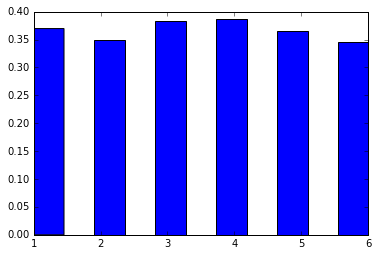

In [27]:
jogadas = []

for i in range(1000):
    jogadas.append(randint(1, 7))
    
plt.hist(jogadas, normed=1,  bins=11)

___
## <font color='blue'>Exercício 2</font>

Ampliando o espaço amostral para as possíveis jogadas de 2 dados, analise as seguintes situações:
    
    a) Jogando os dois dados ao mesmo tempo. Qual é a probabilidade de obter soma 7?
    
    b) Jogando um dado e depois o segundo dado. Qual é a probabilidade de obter soma 7 já sabendo o resultado do primeiro? Compare o resultado com item anterior! Por que é igual ou diferente?

A probabilidade é 16.8%


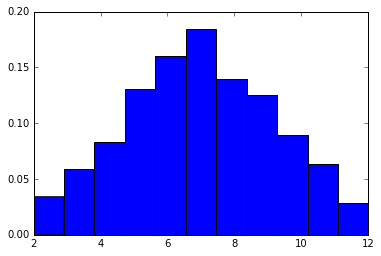

In [47]:
jogadas1 = []
jogadas2 = []
soma =[]
sum7 = 0

for i in range(1000):
    jogadas1.append(randint(1, 7))
    jogadas2.append(randint(1, 7))
    soma.append(jogadas1[i] + jogadas2[i])
    if soma[i] == 7:
        sum7 += 1
    
plt.hist(soma, normed=1,  bins=11)

print("A probabilidade é " + str(sum7/10) + "%")

___
## <font color='blue'>Exercício 3</font>

Simule 10000 vezes o problema de Monty Hall¹ , usar o seguinte algoritmo:


* Repetir 10000 vezes:
    * Sorteie um número de porta de 1 a 3 para ser a premiada
    * Sorteie um número de porta de 1 a 3 para ser a porta escolhida.
    * Sorteie um número de porta para ser a aberta, desde que não seja a premiada e nem a porta escolhida. Assim, se:
        * porta premiada é 1 e a escolhida é 1, sorteie entre as portas 2 e 3 para ser aberta
        * porta premiada é 1 e a escolhida é 2, com probabilidade 1 deve abrir a porta 3
        * porta premiada é 1 e a escolhida é 3, com probabilidade 1 deve abrir a porta 2
        * assim para demais casos...
    
    * Calcule quantas vezes indivíduo ganha ao trocar de porta. Ou seja, se:
        * porta premiada é 1, a escolhida é 1 e aberta é 2 (ou 3), indivíduo perde se trocar de porta
        * porta premiada é 1, a escolhida é 2 e aberta é 3, indivíduo ganha se trocar de porta
        * porta premiada é 1, a escolhida é 3 e aberta é 2, indivíduo ganha se trocar de porta
        * assim para demais casos...
        
    * Exibir quantas vezes em 10000, o indivíduo ganhou ao trocar de porta.

Compare o resultado numérico com o resultado analítico obtido via Teorema de Bayes.

¹https://en.wikipedia.org/wiki/Monty_Hall_problem e 
Exercício 1.4.5 de http://www.portalaction.com.br/probabilidades/14-eventos-independentes-e-probabilidade-condicional

In [45]:
ganhou = 0

for i in range(100000):
    portas = [1, 2, 3]
    porta_premiada = choice(portas)
    porta_escolhida = choice(portas)
    
    if porta_premiada == porta_escolhida:
        portas.remove(porta_premiada)
        abriu = choice(portas)
        
    elif porta_premiada != porta_escolhida:
        portas.remove(porta_premiada)
        portas.remove(porta_escolhida)
        abriu = choice(portas)
        ganhou += 1
        

        
print("A probabilidade do indivíduo ganhar é de " + str(ganhou/1000) + "%")

A probabilidade do indivíduo ganhar é de 66.698%
